<a href="https://colab.research.google.com/github/itman0101/ML-practices/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [7]:
from sklearn.datasets import load_boston


data = load_boston()
boston_df = pd.DataFrame(data.data, columns=data.feature_names)


In [12]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [16]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [17]:
X = boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

In [22]:
# i get the MEDV as name as target from load boston original file not from dataframe.
y = data['target']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [29]:

from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print(lm.intercept_)

41.28149654473815


In [33]:
lm.coef_

array([-7.75583711e-02,  4.20310157e-02,  9.11529473e-02,  4.13304932e+00,
       -1.99765575e+01,  2.89019042e+00,  1.61533256e-02, -1.26474745e+00,
        2.60170760e-01, -1.11251993e-02, -8.80555502e-01,  7.02445445e-03,
       -6.43482813e-01])

In [35]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])

In [36]:
cdf

,Coef
CRIM,-0.077558
ZN,0.042031
INDUS,0.091153
CHAS,4.133049
NOX,-19.976557
RM,2.890190
AGE,0.016153
DIS,-1.264747
RAD,0.260171
TAX,-0.011125


  # **Predictions**

> after propering data and fit the model on it , it's time to make predictions and evaluate the model.



In [37]:
predictions = lm.predict(X_test)

In [38]:
predictions

array([38.76995104, 27.39271318, 16.26805601, 16.64592872, 30.5945708 ,
       31.37975753, 37.68282481,  7.57986744, 33.62371472,  6.94206736,
       30.00015138, 13.74184077, 16.41357803, 17.5975484 , 24.92452314,
       20.61277162,  6.84027833, 32.74459645, 28.14176473, 24.87051184,
       12.01460369, 19.89597528, 22.93223855, 24.84808083, 33.41944923,
       18.2663553 , 32.40616206, 19.07263109, 27.85446156, 33.36724349,
       20.31071184, 18.71427039, 36.3942392 , 43.97914411, 28.53636198,
       22.23810379, 15.23341286, 18.4441601 ,  2.99896469, 30.75373687,
       23.98495287, 17.65233987, 33.49269972, 13.72450288, 17.45026475,
       25.3864821 , 29.9370352 , 16.43822597, 27.0157306 , 23.23886475,
       31.8958797 , 36.8917952 , 22.96758436, 18.06656811, 30.34602124,
       -0.30828515, 19.8446382 , 16.6131071 , 23.63902347, 21.26225918,
       29.69766593,  3.14282554, 16.86387632, 19.76329036,  9.71050797,
       24.21870511, 24.27695942, 19.87071765, 17.16247142, 19.85

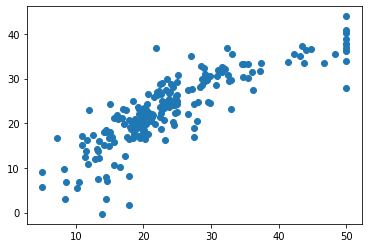

In [39]:
plt.scatter(y_test,predictions)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


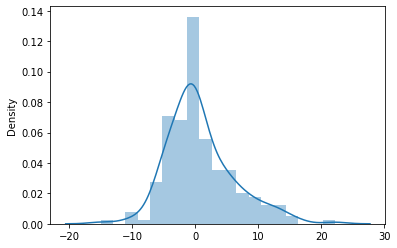

In [40]:
sns.distplot((y_test - predictions))

In [41]:
from sklearn import metrics

In [42]:
metrics.mean_absolute_error(y_test,predictions)

3.905144802627518

In [43]:
metrics.mean_squared_error(y_test,predictions)

29.416365467452977

In [45]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

5.423685598138316